The Sparks Foundation

Task2:Prediction Using Unsupervised ML

Name:Nishi Shah

Problem Definition:Predict the optimum number of clusters

Dataset : https://bit.ly/3kXTdox

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Loading Dataset

In [2]:
dataframe=pd.read_csv("Iris.csv")
print(dataframe.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
dataframe.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
dataframe.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


KMeans Clustering

In [6]:
X=dataframe[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [7]:
#Segrating the columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


Elbow Method

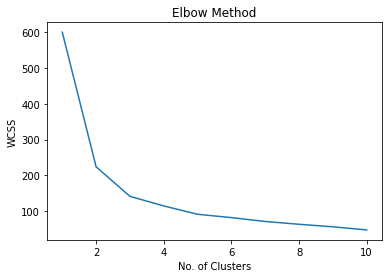

In [8]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
    y_kmeans=kmeans.fit_predict(X)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    dataframe['Cluster']=y_kmeans
plt.plot(range(1,11),wcss)   
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()


In [9]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10)
y_kmeans=kmeans.fit_predict(X)
kmeans.fit(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Visualizing clusters

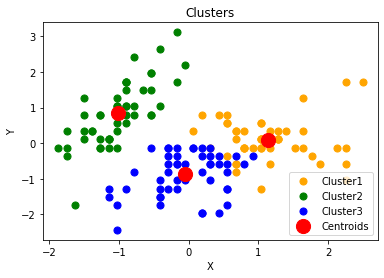

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'orange', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'green', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 50, c = 'blue', label = 'Cluster3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')

plt.title("Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Performance Measures

In [11]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [12]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    silhouette_coefficients.append(score)
    
   

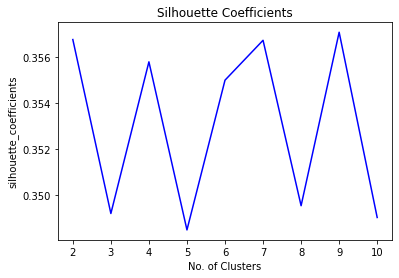

In [13]:
plt.plot(range(2,11),silhouette_coefficients,c='blue')
plt.title("Silhouette Coefficients")
plt.xlabel("No. of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()



In [14]:
#No.of clusters=3
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10)
y_kmeans=kmeans.fit_predict(X)
print("KMeans Inertia Value=",kmeans.inertia_)
kmeans_silhouette=silhouette_score(X,kmeans.labels_)
print("Silhouette value=",kmeans_silhouette)
labels=kmeans.labels_
print("DB Index=",davies_bouldin_score(X,labels))
    

KMeans Inertia Value= 140.96581663074699
Silhouette value= 0.4589717867018717
DB Index= 0.8354098493935597


In [15]:
#No.of clusters=5
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10)
y_kmeans=kmeans.fit_predict(X)
print("KMeans Inertia Value=",kmeans.inertia_)
kmeans_silhouette=silhouette_score(X,kmeans.labels_)
print("Silhouette value=",kmeans_silhouette)
labels=kmeans.labels_
print("DB Index=",davies_bouldin_score(X,labels))
    

KMeans Inertia Value= 91.2578427971818
Silhouette value= 0.3442962563138737
DB Index= 0.9475331385285999


In [16]:
#No.of clusters=7
kmeans=KMeans(n_clusters=7,init='k-means++',max_iter=300,n_init=10)
y_kmeans=kmeans.fit_predict(X)
print("KMeans Inertia Value=",kmeans.inertia_)
kmeans_silhouette=silhouette_score(X,kmeans.labels_)
print("Silhouette value=",kmeans_silhouette)
labels=kmeans.labels_
print("DB Index=",davies_bouldin_score(X,labels))
    

KMeans Inertia Value= 72.16178866465833
Silhouette value= 0.3380271842997504
DB Index= 1.0399636505324612
